# Logistic Regression 

## import library

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [61]:
fname_data = 'assignment_08_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
number_data = data.shape[0]

point_x = data[:, 0]
point_y = data[:, 1]
label   = data[:, 2]

print('number of data = ', number_data)
print('data type of point x = ', point_x.dtype)
print('data type of point y = ', point_y.dtype)

point_x_class_0 = point_x[label == 0]
point_y_class_0 = point_y[label == 0]

point_x_class_1 = point_x[label == 1]
point_y_class_1 = point_y[label == 1]

number of data =  600
data type of point x =  float64
data type of point y =  float64


## plot the data

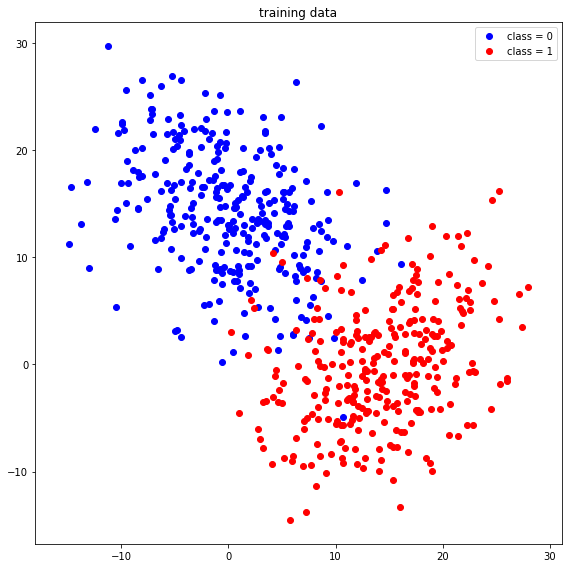

In [62]:
f = plt.figure(figsize=(8,8))   

plt.title('training data')
plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \theta_2)$
- point = $(1, x, y) \in \mathbb{R}^3$

In [90]:
a1 = np.ones((number_data,))
point = np.column_stack((a1,point_x,point_y))

In [91]:
def compute_linear_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #point : [1,x,y] 주르륵
     

    
    value = (theta[0]*1)+(theta[1]*point[:,1])+(theta[2]*point[:,2])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
compute_linear_regression([1,1,1], point)

array([ 2.98096621e+01,  1.43859461e+01,  1.54654368e+01,  1.63391342e+01,
        1.23536776e+01,  1.35308624e+01, -2.62531530e+00,  1.32721999e+01,
        2.53945055e+01,  1.85520758e+01,  1.98542922e+01,  2.24473891e+01,
        1.59902790e+01,  1.09013337e+01,  2.64584380e+01,  2.89851373e+01,
        7.19337340e+00,  1.33912773e+01,  1.71846507e+01,  1.11070199e+01,
        1.49522767e+01,  2.45499433e+01,  1.68596458e+01,  1.13908622e+01,
        1.42034071e+01,  8.59429582e+00,  1.68194377e+01,  2.09988616e+01,
        9.18718250e+00,  1.31507212e+01,  1.07039457e+01,  1.72729553e+01,
        2.62653628e+01,  1.54451847e+01,  1.67321864e+01,  1.81889653e+01,
        1.27320646e+01,  9.83516528e+00,  9.15107817e+00,  3.20017605e+01,
        2.21999243e+01, -9.58174805e-01,  6.43221018e+00,  2.91000774e+00,
        1.50993026e+01,  1.76536801e+01,  9.76467158e+00,  4.19815798e+00,
        1.82728824e+01,  1.79791770e+01,  1.19565145e+01,  2.04744459e+01,
        1.74898607e+01,  

## define sigmoid function with input

- $z \in \mathbb{R}$

In [92]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #z는 스칼라
    
    
    value = 1/(1+np.exp(-z))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
sigmoid(compute_linear_regression([1,1,1], point))

array([1.00000000e+00, 9.99999435e-01, 9.99999808e-01, 9.99999920e-01,
       9.99995686e-01, 9.99998671e-01, 6.75268348e-02, 9.99998278e-01,
       1.00000000e+00, 9.99999991e-01, 9.99999998e-01, 1.00000000e+00,
       9.99999886e-01, 9.99981567e-01, 1.00000000e+00, 1.00000000e+00,
       9.99249015e-01, 9.99998472e-01, 9.99999966e-01, 9.99984994e-01,
       9.99999679e-01, 1.00000000e+00, 9.99999952e-01, 9.99988702e-01,
       9.99999322e-01, 9.99814875e-01, 9.99999950e-01, 9.99999999e-01,
       9.99897668e-01, 9.99998056e-01, 9.99977544e-01, 9.99999968e-01,
       1.00000000e+00, 9.99999804e-01, 9.99999946e-01, 9.99999987e-01,
       9.99997045e-01, 9.99946467e-01, 9.99893906e-01, 1.00000000e+00,
       1.00000000e+00, 2.77243778e-01, 9.98393693e-01, 9.48338944e-01,
       9.99999723e-01, 9.99999978e-01, 9.99942558e-01, 9.85199132e-01,
       9.99999988e-01, 9.99999984e-01, 9.99993583e-01, 9.99999999e-01,
       9.99999975e-01, 9.99999797e-01, 9.99999545e-01, 9.99999985e-01,
      

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point = $(1, x, y) \in \mathbb{R}^3$

In [93]:
def compute_logistic_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    f = compute_linear_regression(theta, point)
    value = sigmoid(f)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
sigmoid(compute_logistic_regression([1,1,1], point))

array([0.73105858, 0.73105847, 0.73105854, 0.73105856, 0.73105773,
       0.73105832, 0.5168753 , 0.73105824, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105856, 0.73105495, 0.73105858,
       0.73105858, 0.7309109 , 0.73105828, 0.73105857, 0.73105563,
       0.73105852, 0.73105858, 0.73105857, 0.73105636, 0.73105845,
       0.73102218, 0.73105857, 0.73105858, 0.73103846, 0.7310582 ,
       0.73105416, 0.73105857, 0.73105858, 0.73105854, 0.73105857,
       0.73105858, 0.731058  , 0.73104805, 0.73103772, 0.73105858,
       0.73105858, 0.56887037, 0.73074264, 0.720781  , 0.73105852,
       0.73105857, 0.73104728, 0.72813862, 0.73105858, 0.73105858,
       0.73105732, 0.73105858, 0.73105857, 0.73105854, 0.73105849,
       0.73105858, 0.73105858, 0.73105017, 0.73105776, 0.73105858,
       0.73104698, 0.73105725, 0.73105857, 0.73105856, 0.73105855,
       0.73105858, 0.73105857, 0.73105858, 0.73105858, 0.71714234,
       0.73105858, 0.73098525, 0.72972942, 0.73105857, 0.73105

## define the residual function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (x, y) \in \mathbb{R}^2$
- label $= l \in \{0, 1\}$

In [100]:
def compute_residual(theta, point, label):
 
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # i번째 데이터 cross entropy 
    #
    f= compute_linear_regression(theta, point)
    h = sigmoid(f)
    residual = (-label)*np.log(h)-(1-label)*np.log(1-h)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
compute_residual([1,1,1], point, label)



/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_23325/3690807921.py:9: RuntimeWarning: divide by zero encountered in log
  residual = (-label)*np.log(h)-(1-label)*np.log(1-h)
/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_23325/3690807921.py:9: RuntimeWarning: invalid value encountered in multiply
  residual = (-label)*np.log(h)-(1-label)*np.log(1-h)


array([2.98092427e+01, 1.43859467e+01, 1.54654370e+01, 1.63391343e+01,
       1.23536819e+01, 1.35308637e+01, 6.99149051e-02, 1.32722016e+01,
       2.53944974e+01, 1.85520758e+01, 1.98542922e+01, 2.24473890e+01,
       1.59902791e+01, 1.09013522e+01, 2.64584446e+01, 2.89848952e+01,
       7.19412467e+00, 1.33912788e+01, 1.71846507e+01, 1.11070349e+01,
       1.49522771e+01, 2.45499413e+01, 1.68596458e+01, 1.13908735e+01,
       1.42034078e+01, 8.59448096e+00, 1.68194378e+01, 2.09988617e+01,
       9.18728484e+00, 1.31507232e+01, 1.07039682e+01, 1.72729553e+01,
       2.62653890e+01, 1.54451849e+01, 1.67321865e+01, 1.81889653e+01,
       1.27320676e+01, 9.83521881e+00, 9.15118427e+00, 3.20006021e+01,
       2.21999247e+01, 3.24683289e-01, 6.43381778e+00, 2.96305104e+00,
       1.50993029e+01, 1.76536801e+01, 9.76472902e+00, 4.21306948e+00,
       1.82728824e+01, 1.79791770e+01, 1.19565209e+01, 2.04744460e+01,
       1.74898607e+01, 1.54119326e+01, 1.46033647e+01, 1.79939204e+01,
      

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [104]:
def compute_loss(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = compute_residual(theta, point, label)
    
    loss = (1/number_data)*np.sum(residual)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
compute_loss([1,1,1],point,label)

/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_23325/3690807921.py:9: RuntimeWarning: divide by zero encountered in log
  residual = (-label)*np.log(h)-(1-label)*np.log(1-h)
/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_23325/3690807921.py:9: RuntimeWarning: invalid value encountered in multiply
  residual = (-label)*np.log(h)-(1-label)*np.log(1-h)


nan

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [105]:
def compute_gradient(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    a1 = np.ones((number_data,))
    X = np.column_stack((a1,point[:,1], point[:,2]))
    X_t = np.transpose(X)
    residual = compute_residual(theta, point, label)
    gradient = (2/number_data)*np.dot(X_t,residual)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

array([nan, nan, nan])

## initialize the gradient descent algorithm

In [106]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

number_point_class_0    = len(point_x_class_0)
number_point_class_1    = len(point_x_class_1)

point_class_0   = np.ones((number_point_class_0, 3))
point_class_1   = np.ones((number_point_class_1, 3))

point_class_0[:, 1] = point_x_class_0
point_class_0[:, 2] = point_y_class_0
 
point_class_1[:, 1] = point_x_class_1
point_class_1[:, 2] = point_y_class_1

label_0     = np.zeros(number_point_class_0)
label_1     = np.ones(number_point_class_1)

point = np.concatenate((point_class_0, point_class_1), axis=0)
label = np.concatenate((label_0, label_1), axis=0)

print('shape of point_class_0 : ', point_class_0.shape)
print('shape of point_class_1 : ', point_class_1.shape)
print('shape of label_0 : ', label_0.shape)
print('shape of label_1 : ', label_1.shape)

print('shape of point : ', point.shape)
print('shape of label : ', label.shape)

shape of point_class_0 :  (300, 3)
shape of point_class_1 :  (300, 3)
shape of label_0 :  (300,)
shape of label_1 :  (300,)
shape of point :  (600, 3)
shape of label :  (600,)


## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [107]:
for i in range(num_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    theta = theta - learning_rate * compute_gradient(theta, point, label)
    loss = compute_loss(theta, point, label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    theta_iteration[i, :]   = theta
    loss_iteration[i]       = loss

theta_optimal = theta

/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_23325/3690807921.py:9: RuntimeWarning: divide by zero encountered in log
  residual = (-label)*np.log(h)-(1-label)*np.log(1-h)
/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_23325/4031470235.py:9: RuntimeWarning: invalid value encountered in add
  value = (theta[0]*1)+(theta[1]*point[:,1])+(theta[2]*point[:,2])
/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_23325/3690807921.py:9: RuntimeWarning: invalid value encountered in multiply
  residual = (-label)*np.log(h)-(1-label)*np.log(1-h)


___

___

## functions for presenting the results

___

___

In [ ]:
def function_result_01():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_linear_regression(input1, input2)
    
    print(value)

In [ ]:
def function_result_02():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_logistic_regression(input1, input2)

    print(value)

In [ ]:
def function_result_03():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([0, 1])

    value = compute_residual(input1, input2, input3)

    print(value)

In [ ]:
def function_result_04():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_loss(input1, input2, input3)

    print(value)

In [ ]:
def function_result_05():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_gradient(input1, input2, input3)

    print(value)

In [ ]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_07():
    
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    plt.plot(theta_iteration[:, 0], '-', color='red', label=r'$\theta_0$')
    plt.plot(theta_iteration[:, 1], '-', color='green', label=r'$\theta_1$')
    plt.plot(theta_iteration[:, 2], '-', color='blue', label=r'$\theta_2$')
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [ ]:
def function_result_08():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

## plot the logistic regression values over the 2-dimensional Euclidean space

In [ ]:
def function_result_09():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

___

___

## results

___

___

In [ ]:
number_result = 9

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)